In [1]:
import pandas as pd
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import statistics as st

In [9]:
# task 1: a) load data
data=pd.read_csv('DS1_C8_S2_SmartCarRiding_Data_Practice.csv')
data

,Index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,49:00.0,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,09:00.0,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,42:00.0,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,56:25.0,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695416,1


In [11]:
# b) columns in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [13]:
# number of rows, columns
data.shape

(200000, 9)

In [15]:
# extract a column
amount=data['fare_amount']
amount

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199995     3.0
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: fare_amount, Length: 200000, dtype: float64

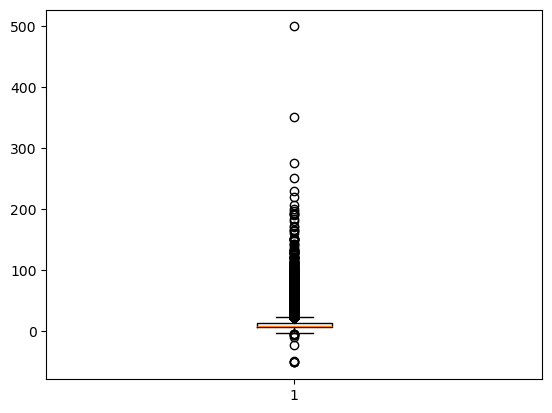

In [17]:
plt.boxplot(data['fare_amount'])
plt.show()

In [19]:
# task 2: outlier treatment
fare_amt=pd.Series(data['fare_amount'])
q1=fare_amt.quantile(0.25)
q3=fare_amt.quantile(0.75)
iqr=q3-q1
uf=q3+1.5*iqr
lf=q1-1.5*iqr
for z in fare_amt:
    if z > uf or z < lf:
        data['fare_amount']=data['fare_amount'].replace(to_replace=z, value=data['fare_amount'].mean())
        

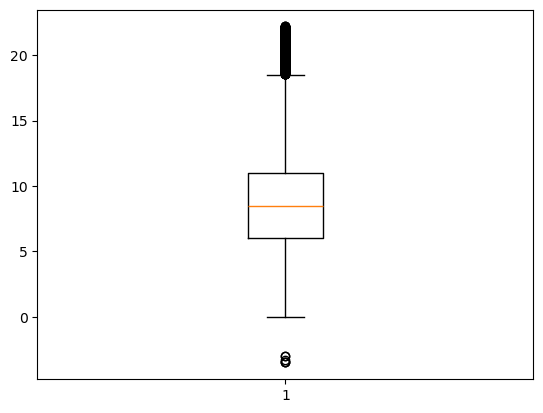

In [21]:
plt.boxplot(data['fare_amount'])
plt.show()

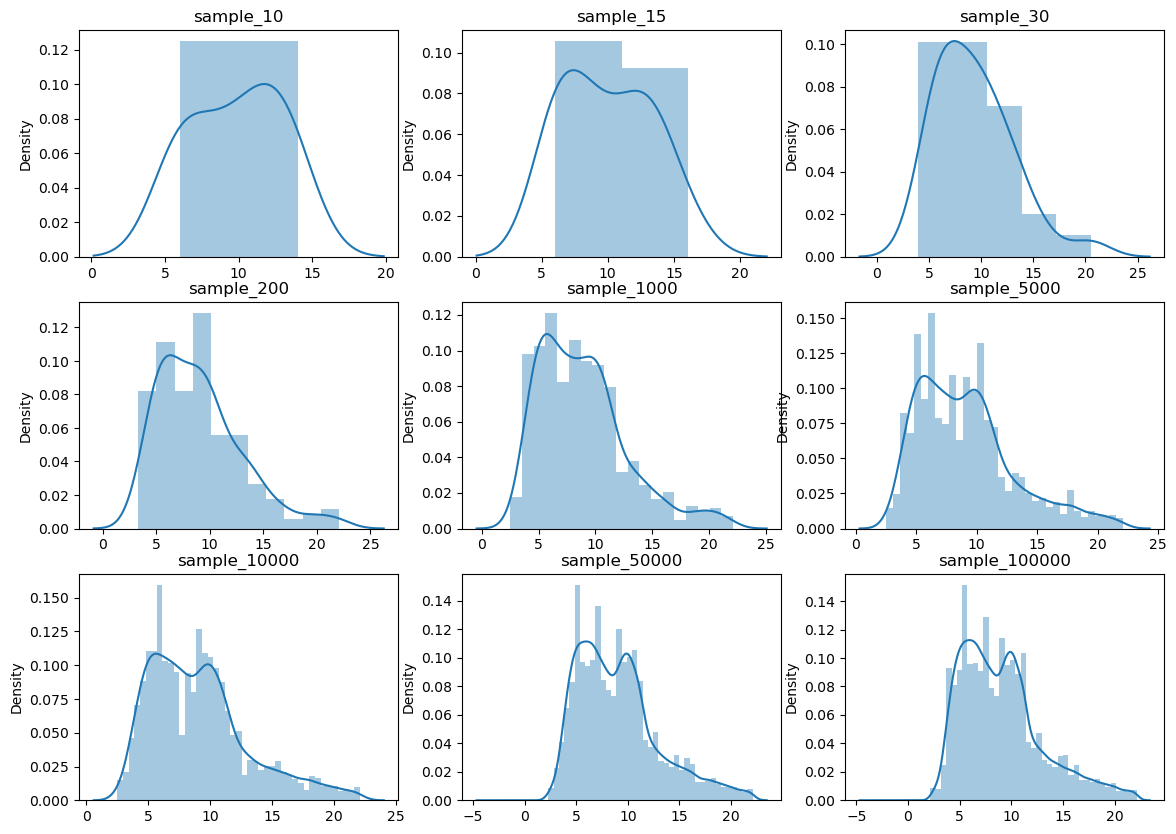

In [53]:
#task 3: distribution plot for different sizes sample
num = [10,15,30,200,1000,5000,10000,50000,100000]
fig,ax=plt.subplots(3,3,figsize=(14,10))
sep_df=pd.DataFrame()
list_for_all = []

for size in num:
    sep_df=data.sample(n=size,replace=True,random_state=1)
    list_for_all.append(sep_df['fare_amount'].tolist())

k=0
for i in range(0,3):
    for j in range(0,3):
        sns.distplot(list_for_all[k],ax=ax[i,j])
        ax[i,j].set_title(label='sample_'+str(len(list_for_all[k])))
        k=k+1

plt.show()

In [25]:
#task 4: simple random sampling
samp_200 = data.sample(n=200,replace=True,random_state=1)
samp_200

,Index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
128037,34880869,32:56.0,11.25193,2010-12-26 14:32:56 UTC,-73.965069,40.791239,-73.782221,40.648726,1
5192,10514640,28:00.0,14.00000,2012-11-27 21:28:00 UTC,-73.776675,40.645348,-73.819305,40.670327,2
50057,39371632,09:00.0,12.90000,2010-08-23 22:09:00 UTC,-73.994013,40.724697,-73.994923,40.762680,1
109259,37753824,22:30.0,6.00000,2013-10-09 08:22:30 UTC,-73.981399,40.741402,-73.991322,40.739277,1
73349,48099710,23:07.0,6.10000,2012-01-17 20:23:07 UTC,-73.988700,40.748039,-74.003445,40.738223,2
...,...,...,...,...,...,...,...,...,...
119440,38653342,29:00.0,7.70000,2011-01-15 13:29:00 UTC,-73.966792,40.788865,-73.981745,40.766047,1
176028,16314367,26:00.0,4.50000,2009-04-23 13:26:00 UTC,-73.993047,40.743015,-73.982815,40.738575,5
38122,37151879,57:00.0,13.00000,2013-12-19 20:57:00 UTC,-73.978997,40.762238,-73.987182,40.751058,1
15917,4467260,52:26.0,4.50000,2012-08-14 02:52:26 UTC,-73.965087,40.714338,-73.957762,40.717726,1


In [27]:
import scipy.stats as sts

In [57]:
# task5 a): central tendency & measure of dispersion of population
list_p=data['fare_amount'].tolist()
mean_p=st.mean(list_p)
median_p=st.median(list_p)
mode_p=st.mode(list_p)
std_p=st.stdev(list_p)
skew_p=sts.skew(list_p, bias = False)
kurt_p=sts.kurtosis(list_p, bias = False)
print('Mean of poluation:',mean_p)
print('Median of population:',median_p)
print('Mode of population:',mode_p)
print('Standard deviation:',std_p)
print('skewness of population:',skew_p)
print('Kurtosis of population:',kurt_p)

Mean of poluation: 9.05481383208844
Median of population: 8.5
Mode of population: 6.5
Standard deviation: 3.983557237493773
skewness of population: 0.9442085408217941
Kurtosis of population: 0.6011356325247013


In [59]:
# task5 b): central tendency & measure of dispersion of sample size 200
list_s=samp_200['fare_amount'].tolist()
mean_s=st.mean(list_s)
median_s=st.median(list_s)
mode_s=st.mode(list_s)
std_s=st.stdev(list_s)
skew_s=sts.skew(list_s, bias=False)
kurt_s=sts.kurtosis(list_s, bias=False)
print('Mean of sample:',mean_s)
print('Median of sample:',median_s)
print('Mode of sample:',mode_s)
print('Standard deviation:',std_s)
print('skewness of sample:',skew_s)
print('Kurtosis of sample:',kurt_s)

Mean of sample: 9.102000038551823
Median of sample: 8.5
Mode of sample: 8.5
Standard deviation: 3.9895502437103425
skewness of sample: 1.0406406533780885
Kurtosis of sample: 0.9577154039196119


In [33]:
sample_df=pd.DataFrame()
for i in range(0,20):
    sample_df['sample_'+str(i)] = data['fare_amount'].sample(n=200,replace=True).reset_index(drop=True)

sample_df

,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,sample_10,sample_11,sample_12,sample_13,sample_14,sample_15,sample_16,sample_17,sample_18,sample_19
0,6.5,7.50,5.300000,8.0,11.300000,5.500000,3.300000,15.0,6.0,8.100000,7.300000,10.1,5.300000,5.7,10.594648,10.125712,17.000000,12.5,5.00000,5.70000
1,7.3,9.70,13.300000,6.5,2.500000,6.500000,10.100000,4.9,11.5,11.000000,5.300000,9.9,9.606841,5.0,7.300000,11.500000,10.853233,19.0,10.50000,6.10000
2,12.0,8.50,5.000000,3.5,5.300000,7.700000,6.500000,10.0,4.5,9.233384,9.275353,10.0,7.300000,6.5,10.500000,16.100000,11.400000,4.5,10.50000,10.90000
3,6.1,3.30,7.300000,7.0,8.900000,3.300000,6.500000,13.3,5.3,11.000000,9.179763,4.5,9.700000,8.1,5.000000,7.700000,6.100000,12.1,8.50000,11.00000
4,10.9,4.10,10.500000,6.1,9.491419,8.900000,3.700000,13.7,6.0,9.300000,5.000000,4.1,8.500000,9.5,20.500000,10.271857,6.100000,16.5,9.39125,10.90000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,9.7,8.10,17.700000,6.5,11.300000,20.100000,6.500000,5.7,16.9,14.500000,10.306800,10.0,7.700000,2.5,4.500000,8.100000,6.900000,9.5,18.50000,10.90000
196,4.9,12.00,11.177018,6.5,5.700000,7.700000,10.188607,4.5,8.9,10.557977,6.100000,9.5,8.500000,4.1,8.500000,8.500000,7.500000,21.0,7.30000,8.10000
197,10.9,15.47,7.300000,15.0,10.032714,9.300000,11.500000,14.9,9.7,4.500000,4.900000,3.7,15.700000,4.0,4.500000,7.000000,9.700000,4.5,5.70000,10.90000
198,7.5,9.00,3.700000,5.3,5.500000,11.109421,9.203964,6.1,4.5,10.181026,14.500000,4.5,9.700000,8.9,9.500000,3.700000,11.300000,10.0,5.70000,11.25193


In [41]:
sample_name = sample_df.columns
mean=[]
for i in sample_name:
    mean.append(sample_df[i].mean())

mean

[8.843398938326924,
 8.272849431435672,
 8.766348064458494,
 8.921969789975163,
 9.015406980353886,
 9.196081819375452,
 9.215377837976956,
 9.102454984129539,
 8.965697985126823,
 9.364512407164902,
 9.05676258579618,
 9.13736069602495,
 8.733852201496763,
 9.40126672327562,
 8.735592045450003,
 8.759197972128819,
 9.040891909914562,
 9.07442277345678,
 8.974733195556865,
 8.986375488015026]

In [43]:
# standard deviation of 20 sample mean
std = st.stdev(mean)
std

0.25380896610975523

In [47]:
import math as m

In [49]:
# standard deviation from population divided by square root of size of sample
std_p_size = std_p/m.sqrt(200)
std_p_size

0.2816800335876597

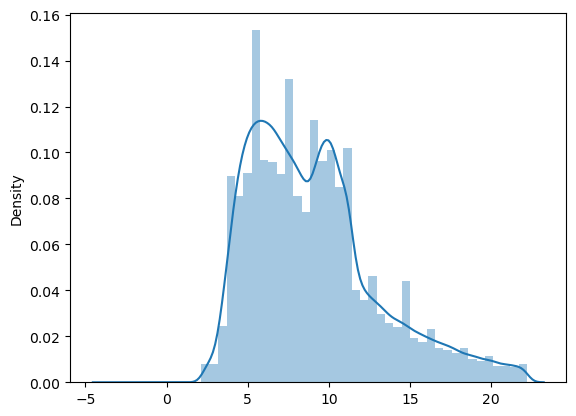

In [61]:
# distribution of population
sns.distplot(list_p)
plt.show()

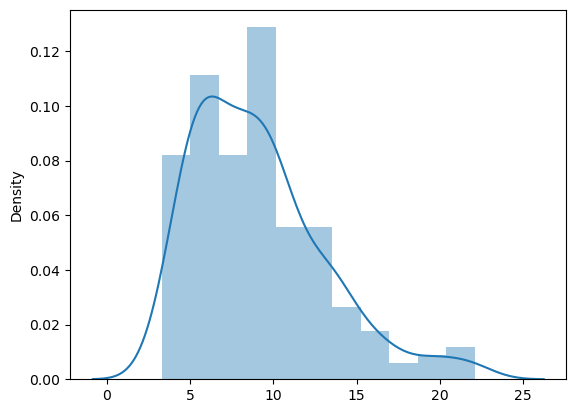

In [63]:
# distribution of sample
sns.distplot(list_s)
plt.show()